In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
avito_d_path = '/content/drive/MyDrive/Разведочный анализ/Data_from_avito.xlsx'
avtoru_d_path = '/content/drive/MyDrive/Разведочный анализ/AvtoRu_prep.xlsx'
path = '/content/drive/MyDrive/Разведочный анализ/'

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df_avtoru = pd.read_excel(avtoru_d_path, index_col=0)
df_avtoru.head()

,name,price,crash,year,run,back,color,engine,tax,transmission,drive,rudder,condition,owners,pasport,customs,cr_date,views,comment,engine_volume,horsepower,engine_type,car_brand,car_model
0,Jeep Grand Cherokee IV (WK2) Рестайлинг,4070000,Онлайн-показ,2018,56500,внедорожник 5 дв.,серебристый,"['3.0 л ', ' 243 л.с. ', ' Дизель']",18225,автоматическая,полный,Левый,Не требует ремонта,1,Оригинал,Растаможен,2021-11-20,2482,Автомобиль покупался в США комплектация S Limi...,3.0 л,243 л.с.,Дизель,Jeep,Grand Cherokee IV (WK2) Рестайлинг
2,LADA (ВАЗ) 2107,129000,ДТП не найдены,2005,77000,седан,зелёный,"['1.6 л ', ' 74 л.с. ', ' Бензин']",888,механическая,задний,Левый,Не требует ремонта,2,Оригинал,Растаможен,2021-11-23,553,Читаем внимательно.,1.6 л,74 л.с.,Бензин,LADA,(ВАЗ) 2107
4,Mercedes-Benz GLK-Класс 300 I (X204),1050000,Дилер всегда на связи,2010,145000,внедорожник 5 дв.,бежевый,"['3.0 л ', ' 231 л.с. ', ' Бензин']",17325,автоматическая,полный,Левый,Не требует ремонта,2,Оригинал,Растаможен,2021-11-26,242,Автомобиль находится в отличном состоянии. Все...,3.0 л,231 л.с.,Бензин,Mercedes-Benz,GLK-Класс 300 I (X204)
6,Mercedes-Benz A-Класс 140 I (W168),199000,ДТП не найдены,2000,220000,хэтчбек 5 дв.,синий,"['1.4 л ', ' 82 л.с. ', ' Бензин']",984,механическая,передний,Левый,Не требует ремонта,3,Дубликат,Растаможен,2021-11-27,17,Добрый день! Выставляется на продажу Mercedes ...,1.4 л,82 л.с.,Бензин,Mercedes-Benz,A-Класс 140 I (W168)
8,BMW X1 20i I (E84) Рестайлинг,1098000,Продлённая гарантия,2012,167193,внедорожник 5 дв.,оранжевый,"['2.0 л ', ' 184 л.с. ', ' Бензин']",9200,автоматическая,полный,Левый,Не требует ремонта,3,Оригинал,Растаможен,2021-11-27,8,10 000 подарков за покупку автомобиля с пробег...,2.0 л,184 л.с.,Бензин,BMW,X1 20i I (E84) Рестайлинг


In [12]:
# заменим индексы
s  = pd.Series([i for i in range(len(df_avtoru))])
df_avtoru = df_avtoru.set_index(s)

In [46]:
# сохраним DataFrame
#df_avtoru.to_excel(path + 'Data_avtoru_prep.xlsx', sheet_name='Cars')

In [47]:
df = pd.read_excel(path+'Data_avtoru_prep.xlsx', index_col=0)
df.head()

,name,price,crash,year,run,back,color,engine,tax,transmission,drive,rudder,condition,owners,pasport,customs,cr_date,views,comment,engine_volume,horsepower,engine_type,car_brand,car_model
0,Jeep Grand Cherokee IV (WK2) Рестайлинг,4070000,Онлайн-показ,2018,56500,внедорожник 5 дв.,серебристый,"['3.0 л ', ' 243 л.с. ', ' Дизель']",18225,автоматическая,полный,Левый,Не требует ремонта,1,Оригинал,Растаможен,2021-11-20,2482,Автомобиль покупался в США комплектация S Limi...,3.0 л,243 л.с.,Дизель,Jeep,Grand Cherokee IV (WK2) Рестайлинг
1,LADA (ВАЗ) 2107,129000,ДТП не найдены,2005,77000,седан,зелёный,"['1.6 л ', ' 74 л.с. ', ' Бензин']",888,механическая,задний,Левый,Не требует ремонта,2,Оригинал,Растаможен,2021-11-23,553,Читаем внимательно.,1.6 л,74 л.с.,Бензин,LADA,(ВАЗ) 2107
2,Mercedes-Benz GLK-Класс 300 I (X204),1050000,Дилер всегда на связи,2010,145000,внедорожник 5 дв.,бежевый,"['3.0 л ', ' 231 л.с. ', ' Бензин']",17325,автоматическая,полный,Левый,Не требует ремонта,2,Оригинал,Растаможен,2021-11-26,242,Автомобиль находится в отличном состоянии. Все...,3.0 л,231 л.с.,Бензин,Mercedes-Benz,GLK-Класс 300 I (X204)
3,Mercedes-Benz A-Класс 140 I (W168),199000,ДТП не найдены,2000,220000,хэтчбек 5 дв.,синий,"['1.4 л ', ' 82 л.с. ', ' Бензин']",984,механическая,передний,Левый,Не требует ремонта,3,Дубликат,Растаможен,2021-11-27,17,Добрый день! Выставляется на продажу Mercedes ...,1.4 л,82 л.с.,Бензин,Mercedes-Benz,A-Класс 140 I (W168)
4,BMW X1 20i I (E84) Рестайлинг,1098000,Продлённая гарантия,2012,167193,внедорожник 5 дв.,оранжевый,"['2.0 л ', ' 184 л.с. ', ' Бензин']",9200,автоматическая,полный,Левый,Не требует ремонта,3,Оригинал,Растаможен,2021-11-27,8,10 000 подарков за покупку автомобиля с пробег...,2.0 л,184 л.с.,Бензин,BMW,X1 20i I (E84) Рестайлинг


#1. Посмотрим на распределение нашего таргета

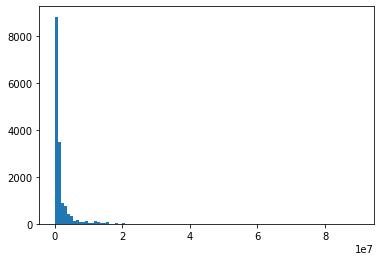

In [49]:
df.price.hist(bins=100, grid=False)

Посмотрим на логарифм таргета

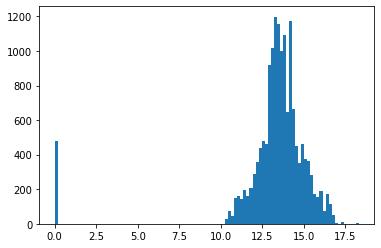

In [52]:
np.log1p(df.price).hist(bins=100, grid=False)

Проверим пропуски в столбце price

In [67]:
# удалим все строки в которых таргет = 0
df.drop(df.loc[df.price == 0].index, axis=0, inplace=True)

In [68]:
# проверяем
df.shape

(15289, 24)

Снова построим гистограмму логарифма таргета

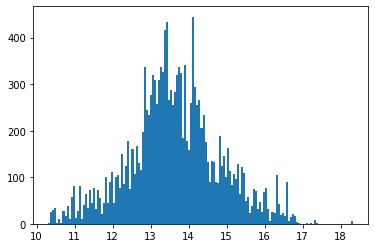

In [75]:
np.log1p(df.price).hist(bins=150, grid=False)

In [73]:
# сохраним DataFrame
#df.to_excel(path + 'Data_avtoru_prep.xlsx', sheet_name='Cars')

Мы получили куда более ясную картину, распределение стало похоже на нормальное. Работать будем теперь с логарифмом. Так линейной регрессии будет куда проще выучить корректную зависимость. А если захотим вернуться к исходным данным, возьмем экспоненту от предсказания.

In [76]:
# добавим колонку с логарифмом таргета
df['log_price'] = np.log1p(df.price)
df.head()

,name,price,crash,year,run,back,color,engine,tax,transmission,drive,rudder,condition,owners,pasport,customs,cr_date,views,comment,engine_volume,horsepower,engine_type,car_brand,car_model,log_price
0,Jeep Grand Cherokee IV (WK2) Рестайлинг,4070000,Онлайн-показ,2018,56500,внедорожник 5 дв.,серебристый,"['3.0 л ', ' 243 л.с. ', ' Дизель']",18225,автоматическая,полный,Левый,Не требует ремонта,1,Оригинал,Растаможен,2021-11-20,2482,Автомобиль покупался в США комплектация S Limi...,3.0 л,243 л.с.,Дизель,Jeep,Grand Cherokee IV (WK2) Рестайлинг,15.219154
1,LADA (ВАЗ) 2107,129000,ДТП не найдены,2005,77000,седан,зелёный,"['1.6 л ', ' 74 л.с. ', ' Бензин']",888,механическая,задний,Левый,Не требует ремонта,2,Оригинал,Растаможен,2021-11-23,553,Читаем внимательно.,1.6 л,74 л.с.,Бензин,LADA,(ВАЗ) 2107,11.767575
2,Mercedes-Benz GLK-Класс 300 I (X204),1050000,Дилер всегда на связи,2010,145000,внедорожник 5 дв.,бежевый,"['3.0 л ', ' 231 л.с. ', ' Бензин']",17325,автоматическая,полный,Левый,Не требует ремонта,2,Оригинал,Растаможен,2021-11-26,242,Автомобиль находится в отличном состоянии. Все...,3.0 л,231 л.с.,Бензин,Mercedes-Benz,GLK-Класс 300 I (X204),13.864302
3,Mercedes-Benz A-Класс 140 I (W168),199000,ДТП не найдены,2000,220000,хэтчбек 5 дв.,синий,"['1.4 л ', ' 82 л.с. ', ' Бензин']",984,механическая,передний,Левый,Не требует ремонта,3,Дубликат,Растаможен,2021-11-27,17,Добрый день! Выставляется на продажу Mercedes ...,1.4 л,82 л.с.,Бензин,Mercedes-Benz,A-Класс 140 I (W168),12.201065
4,BMW X1 20i I (E84) Рестайлинг,1098000,Продлённая гарантия,2012,167193,внедорожник 5 дв.,оранжевый,"['2.0 л ', ' 184 л.с. ', ' Бензин']",9200,автоматическая,полный,Левый,Не требует ремонта,3,Оригинал,Растаможен,2021-11-27,8,10 000 подарков за покупку автомобиля с пробег...,2.0 л,184 л.с.,Бензин,BMW,X1 20i I (E84) Рестайлинг,13.909002


In [77]:
# сохраним DataFrame
#df.to_excel(path + 'Data_avtoru_prep.xlsx', sheet_name='Cars')

#2. Статистики

## Посмотрим на зависимость log цены от года выпуска автомобиля

In [6]:
df = pd.read_excel(path+'Data_avtoru_prep.xlsx', index_col=0)
df.head(2)

,name,price,crash,year,run,back,color,engine,tax,transmission,drive,rudder,condition,owners,pasport,customs,cr_date,views,comment,engine_volume,horsepower,engine_type,car_brand,car_model,log_price
0,Jeep Grand Cherokee IV (WK2) Рестайлинг,4070000,Онлайн-показ,2018,56500,внедорожник 5 дв.,серебристый,"['3.0 л ', ' 243 л.с. ', ' Дизель']",18225,автоматическая,полный,Левый,Не требует ремонта,1,Оригинал,Растаможен,2021-11-20,2482,Автомобиль покупался в США комплектация S Limi...,3.0 л,243 л.с.,Дизель,Jeep,Grand Cherokee IV (WK2) Рестайлинг,15.219154
1,LADA (ВАЗ) 2107,129000,ДТП не найдены,2005,77000,седан,зелёный,"['1.6 л ', ' 74 л.с. ', ' Бензин']",888,механическая,задний,Левый,Не требует ремонта,2,Оригинал,Растаможен,2021-11-23,553,Читаем внимательно.,1.6 л,74 л.с.,Бензин,LADA,(ВАЗ) 2107,11.767575


Text(0, 0.5, 'log от Цены')

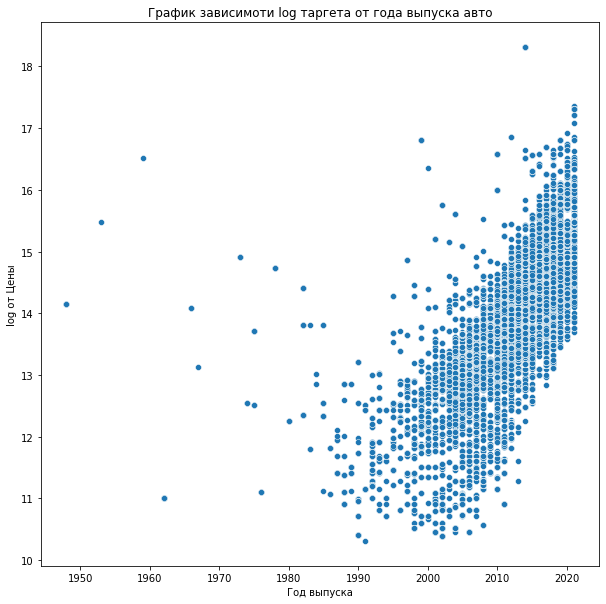

In [97]:
# постром графики зависимости log таргета от переменных
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='year', y='log_price');
plt.title('График зависимоти log таргета от года выпуска авто')
plt.xlabel('Год выпуска')
plt.ylabel('log от Цены')


Посмотрим на этот график с распределением по количеству владельцев

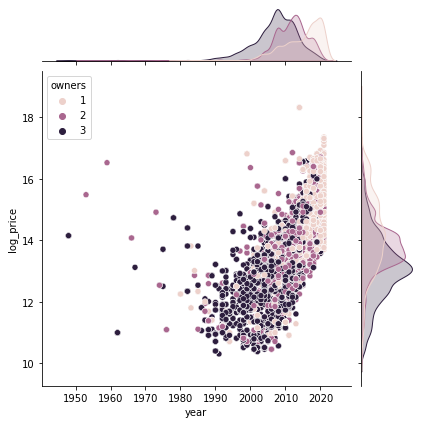

In [8]:
sns.jointplot(data=df, x="year", y="log_price",  hue="owners");

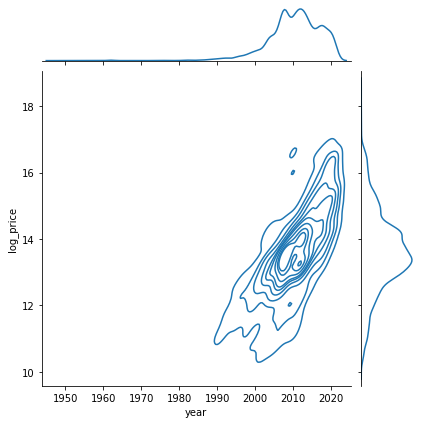

In [9]:
sns.jointplot(data=df, x="year", y="log_price", kind="kde");

**Вывод:** log цены на автомобиль зависит от года выпуска

### Зависит ли log цены от пробега

Text(0, 0.5, 'log от Цены')

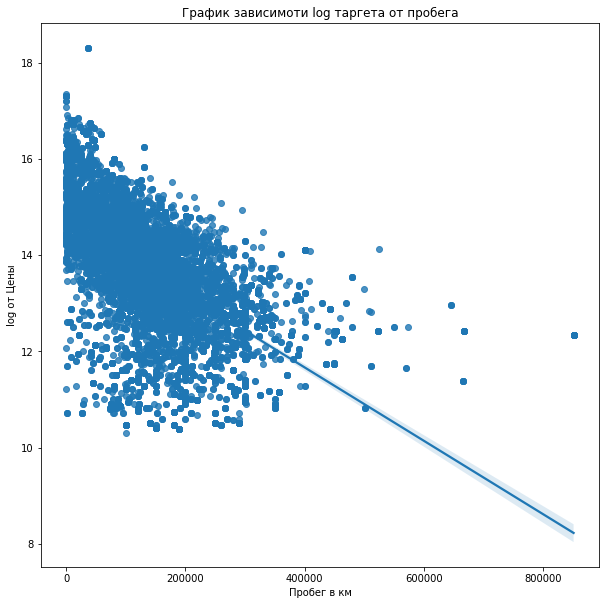

In [99]:
plt.figure(figsize=(10,10))
sns.regplot(data=df, x='run', y='log_price');
plt.title('График зависимоти log таргета от пробега');
plt.xlabel('Пробег в км')
plt.ylabel('log от Цены')

**Вывод**

In [103]:
# преобразуем столбец к строковому типу данных
#df.crash = df.crash.apply(lambda x: str(x))

In [107]:
# сгруппируем по признакуи из колонки crash
gr_by_crash = df.groupby('crash')
crash_mid = gr_by_crash.log_price.median().sort_values()

Text(0, 0.5, 'log от Цены')

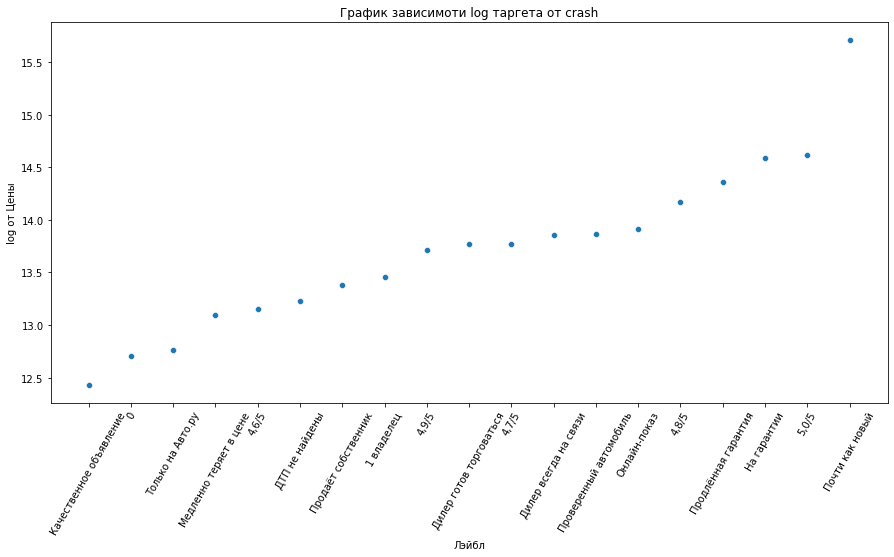

In [130]:
# построим график зависимости от колонки crash
plt.figure(figsize=(15,7))
sns.scatterplot(data=crash_mid);
plt.title('График зависимоти log таргета от crash');
plt.xticks(rotation=60)
plt.xlabel('Лэйбл')
plt.ylabel('log от Цены')

Text(0, 0.5, 'log от Цены')

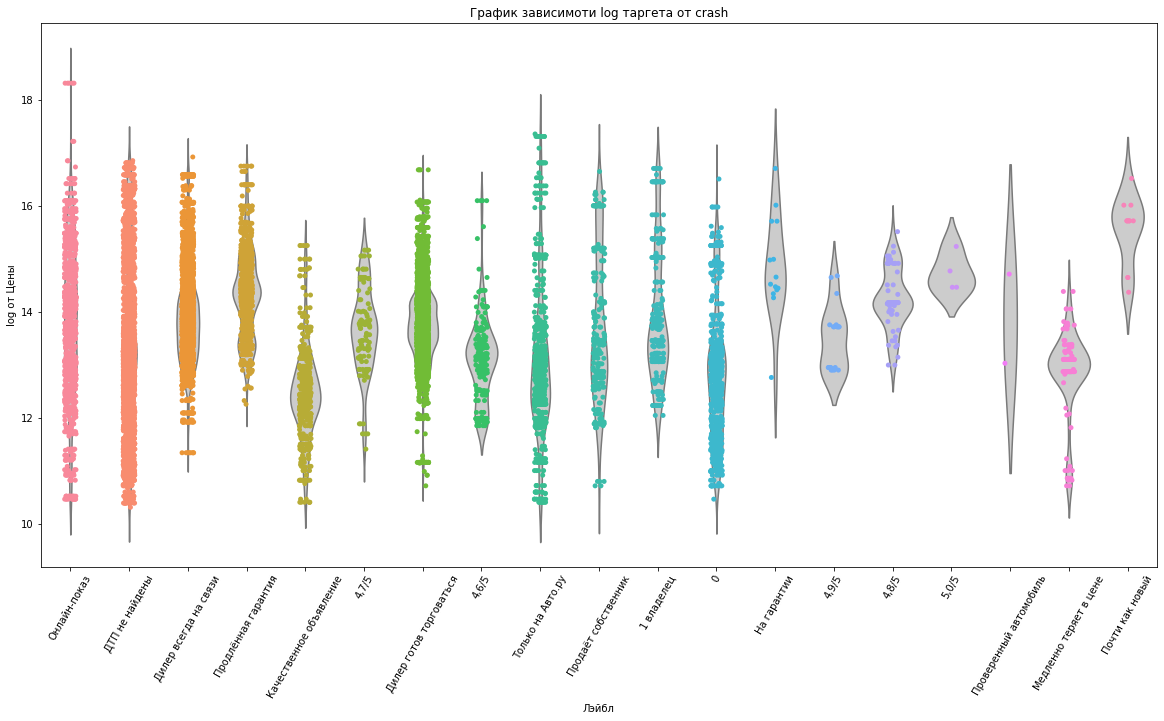

In [120]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(x="crash", y="log_price", data=df, inner=None, color=".8")
ax = sns.stripplot(x="crash", y="log_price", data=df)
plt.title('График зависимоти log таргета от crash');
plt.xticks(rotation=60)
plt.xlabel('Лэйбл')
plt.ylabel('log от Цены')

**Вывод:** Зависимоть log цены на авто от этой переменной есть

### Посмотрим на график зависимости log таргета от типа кузова

In [128]:
# сгруппируем по признаку тип кузова
gr_by_back = df.groupby('back')
back_mid = gr_by_back.log_price.median().sort_values()

Text(0, 0.5, 'log от Цены')

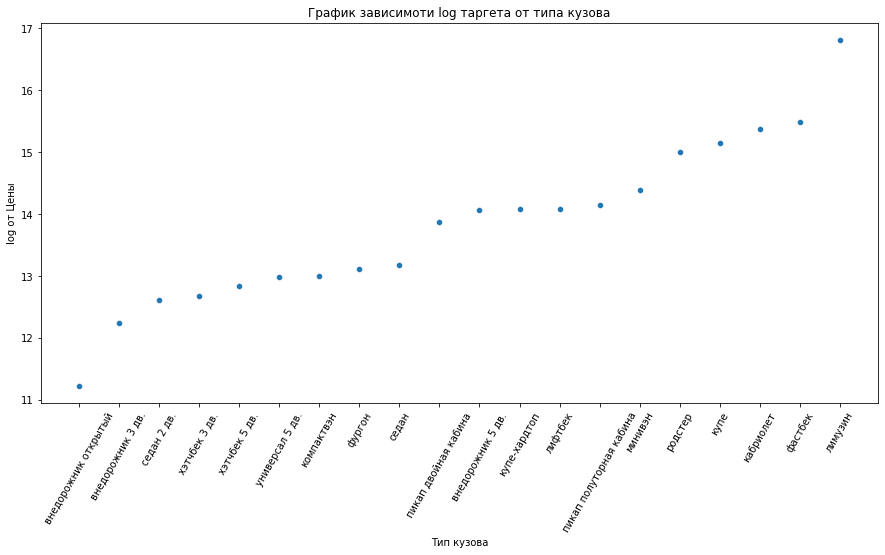

In [129]:
# построим график зависимости от типа кузова
plt.figure(figsize=(15,7))
sns.scatterplot(data=back_mid);
plt.title('График зависимоти log таргета от типа кузова');
plt.xticks(rotation=60)
plt.xlabel('Тип кузова')
plt.ylabel('log от Цены')

Text(0, 0.5, 'log от Цены')

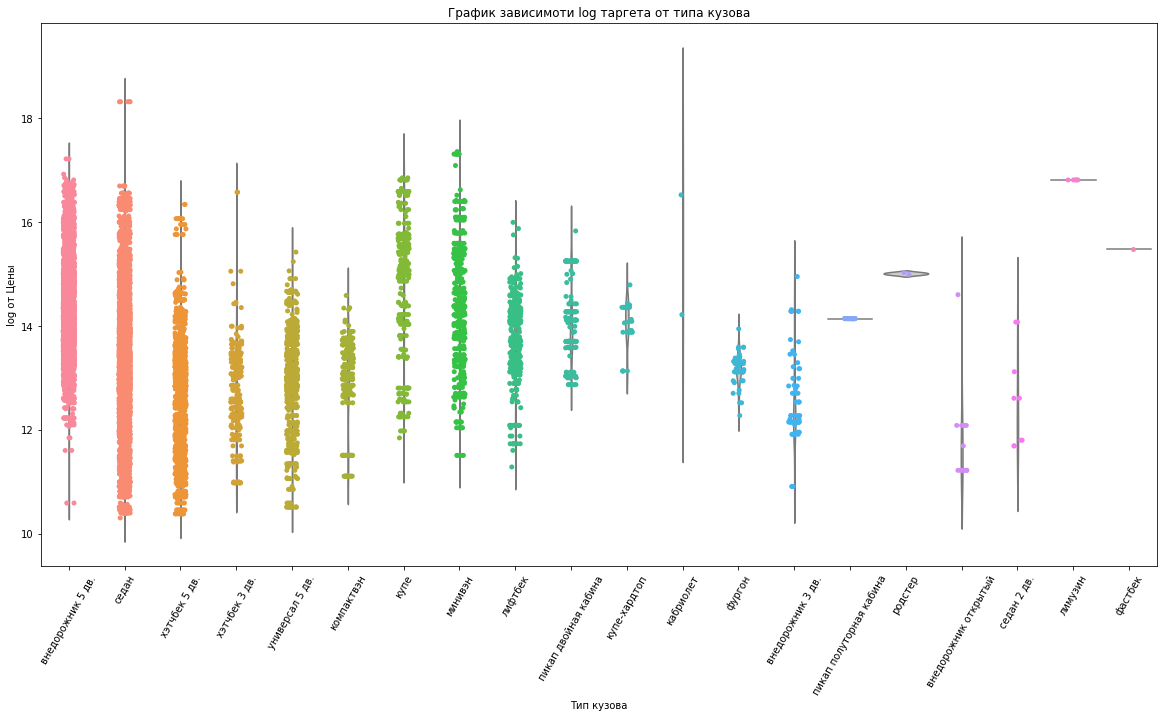

In [125]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(x="back", y="log_price", data=df, inner=None, color=".8")
ax = sns.stripplot(x="back", y="log_price", data=df)
plt.title('График зависимоти log таргета от типа кузова');
plt.xticks(rotation=60)
plt.xlabel('Тип кузова')
plt.ylabel('log от Цены')

**Вывод** между log ценой и типом кузова есть зависимоть

## Посмотрим на зависимость log таргета от цвета автомобиля

Text(0, 0.5, 'log от Цены')

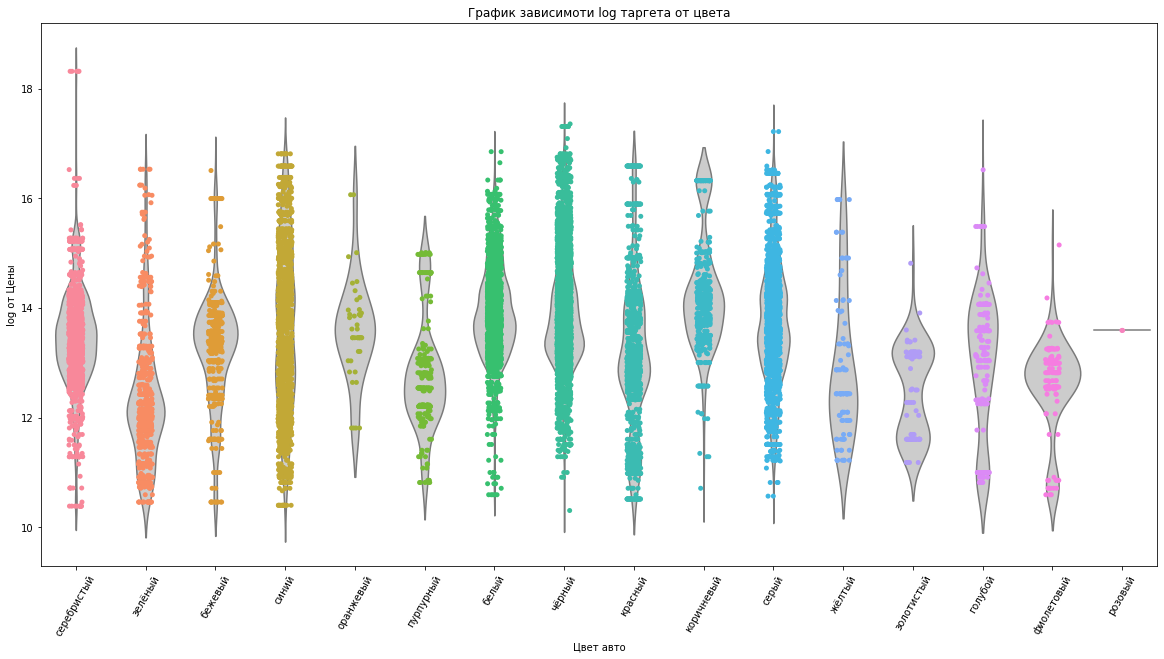

In [132]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(x="color", y="log_price", data=df, inner=None, color=".8")
ax = sns.stripplot(x="color", y="log_price", data=df)
plt.title('График зависимоти log таргета от цвета');
plt.xticks(rotation=60)
plt.xlabel('Цвет авто')
plt.ylabel('log от Цены')

### Теперь посмотрим на налоги и log цены

In [145]:
# так как в некоторых объялениях пропуск, посмотрим что с этим делать
df[df.tax == 0].head(1)

,name,price,crash,year,run,back,color,engine,tax,transmission,drive,rudder,condition,owners,pasport,customs,cr_date,views,comment,engine_volume,horsepower,engine_type,car_brand,car_model,log_price
228,УАЗ Pickup I Рестайлинг 2,677000,Дилер всегда на связи,2017,73721,пикап двойная кабина,коричневый,"['2.7 л ', ' 135 л.с. ', ' Бензин']",0,механическая,полный,Левый,Не требует ремонта,1,Оригинал,Растаможен,2021-11-26,89,10 000 подарков за покупку автомобиля с пробег...,2.7 л,135,Бензин,УАЗ,Pickup I Рестайлинг 2,13.425428


In [157]:
df = pd.read_excel(path+'Data_avtoru_prep.xlsx', index_col=0)

In [178]:
#напишем функцию для заполнения пропусков в налогах
'''Функция подсчена налога на авто по лошадиным силам
input: df.horsepower.values
output: list со значениями налогов по лошадиным силам на места пропусков

Налоги в РФ
0-100(л.с.) 12(руб * л.с.)
100,01-125 25
125,01-150 35
150,01-175 45
175,01-200 50
200,01-225 65
225,01-250 75
>250,01 150'''

def tax_calculate(x): #лошадиные силы
  tax = {1 : 12, 2 : 25, 3 : 35, 4 : 45, 5 : 50, 6 : 65, 7 : 75, 8 : 150}
  result = []
  for i in x:
    if i <= 100:
      result.append(tax[1] * i)
    elif 100 < i <= 125:
      result.append(tax[2] * i)
    elif 125 < i <= 150:
      result.append(tax[3] * i)
    elif 150 < i <= 175:
      result.append(tax[4] * i)
    elif 175 < i <= 200:
      result.append(tax[5] * i)
    elif 200 < i <= 225:
      result.append(tax[6] * i)
    elif 225 < i <= 250:
      result.append(tax[7] * i)
    elif i > 250:
      result.append(tax[8] * i)
  return result

In [181]:
# заполним все пропуски по налогам
df.tax.loc[df.tax == 0] = tax_calculate(df[df.tax == 0].horsepower.values)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [182]:
# Проверяем
df[df.tax ==0]

,name,price,crash,year,run,back,color,engine,tax,transmission,drive,rudder,condition,owners,pasport,customs,cr_date,views,comment,engine_volume,horsepower,engine_type,car_brand,car_model,log_price


In [183]:
# сохраним DataFrame
#df.to_excel(path + 'Data_avtoru_prep.xlsx', sheet_name='Cars')

Теперь можно строить график

Text(0, 0.5, 'log от Цены')

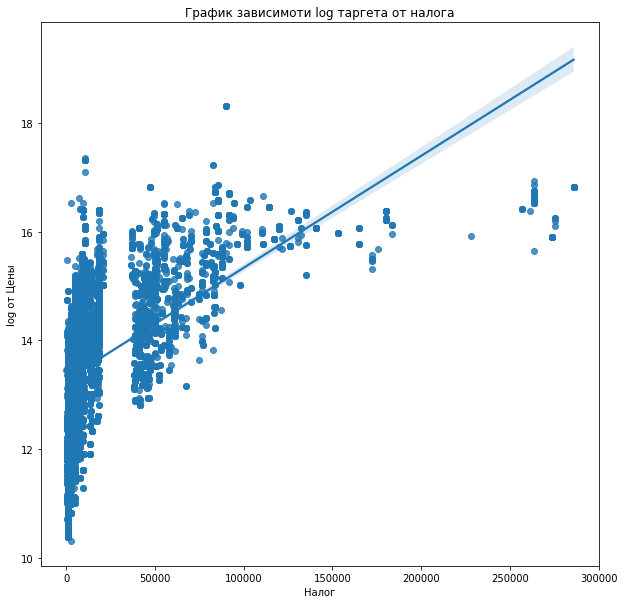

In [184]:
plt.figure(figsize=(10,10))
sns.regplot(data=df, x='tax', y='log_price');
plt.title('График зависимоти log таргета от налога');
plt.xlabel('Налог')
plt.ylabel('log от Цены')

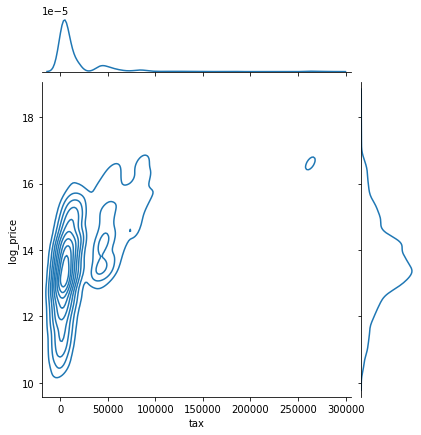

In [185]:
sns.jointplot(data=df, x="tax", y="log_price", kind="kde");

Боремся с выбросами

Text(0, 0.5, 'log от Цены')

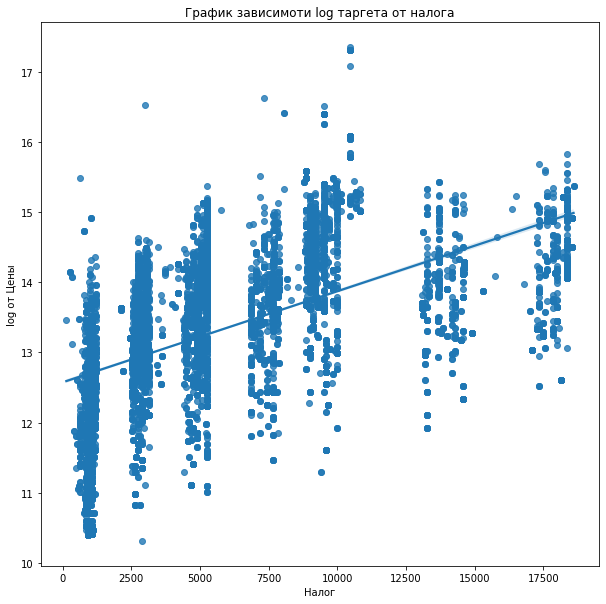

In [189]:
tax_up = df.tax.quantile(0.8)
plt.figure(figsize=(10,10))
sns.regplot(data=df[df.tax < tax_up], x='tax', y='log_price');
plt.title('График зависимоти log таргета от налога');
plt.xlabel('Налог')
plt.ylabel('log от Цены')

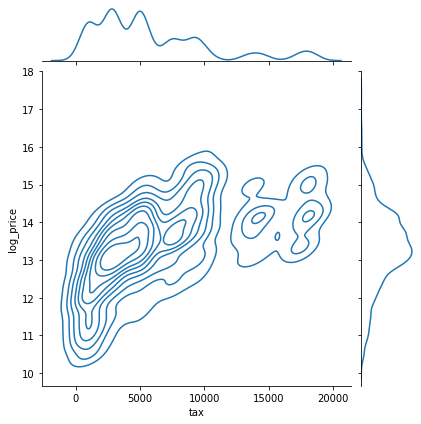

In [190]:
sns.jointplot(data=df[df.tax < tax_up], x="tax", y="log_price", kind="kde");

**Вывод** зависимость цены от налога есть, но признак надо делить на диапазоны


## Посмотрим на зависимость таргета от КПП

Text(0, 0.5, 'log от Цены')

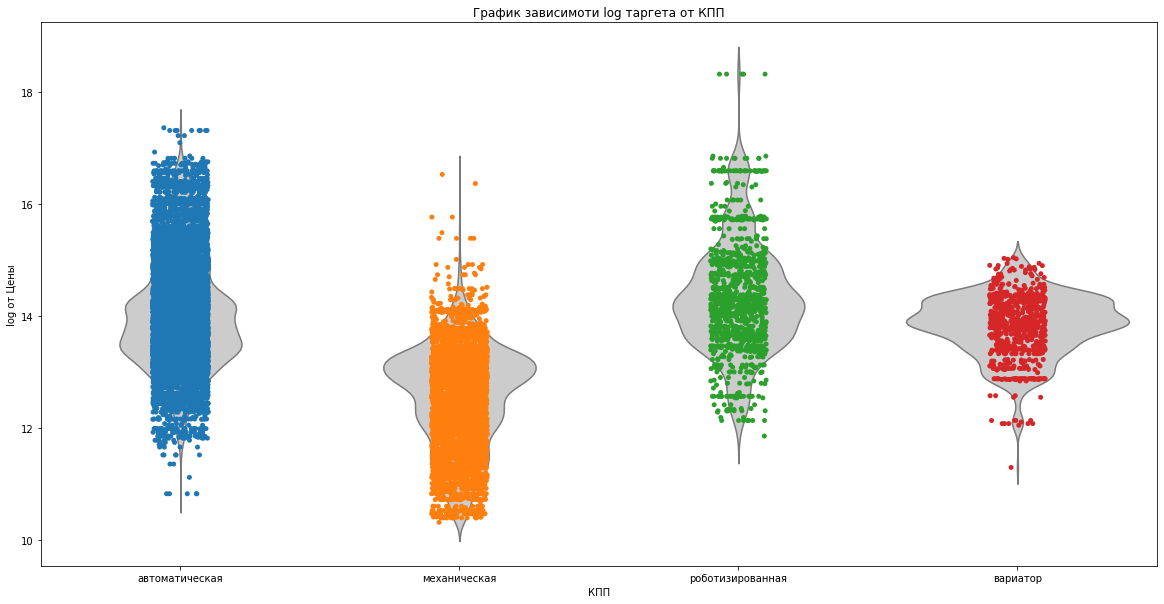

In [197]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(x="transmission", y="log_price", data=df, inner=None, color=".8")
ax = sns.stripplot(x="transmission", y="log_price", data=df)
plt.title('График зависимоти log таргета от КПП');

plt.xlabel('КПП')
plt.ylabel('log от Цены')

**Вывод** механика дешевле!

## Посмотрим на зависимость log таргета от привода

Text(0, 0.5, 'log от Цены')

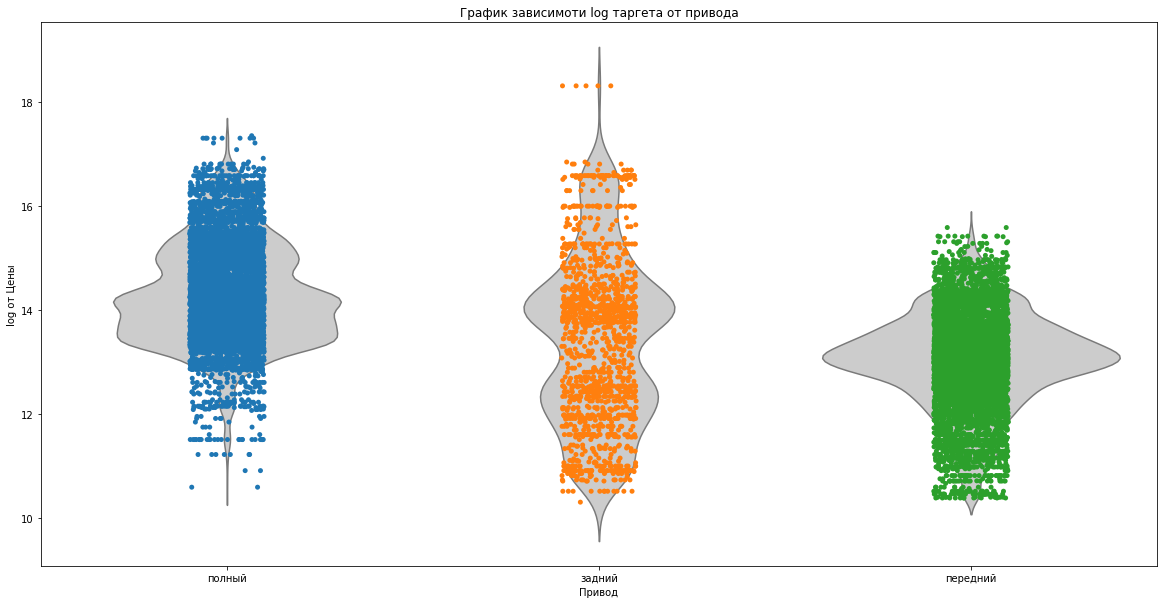

In [196]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(x="drive", y="log_price", data=df, inner=None, color=".8")
ax = sns.stripplot(x="drive", y="log_price", data=df)
plt.title('График зависимоти log таргета от привода');
plt.xlabel('Привод')
plt.ylabel('log от Цены')

**Вывод** передний привод немного дешевле двух других типов

## Посмотрим на зависимость log таргета от типа руля

Text(0, 0.5, 'log от Цены')

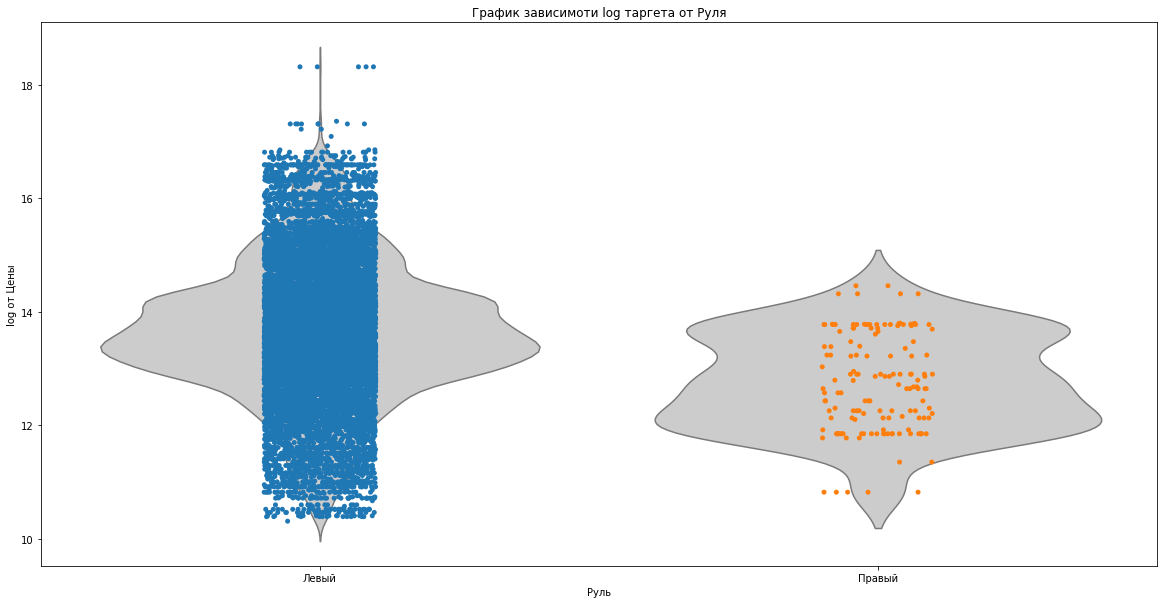

In [199]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(x="rudder", y="log_price", data=df, inner=None, color=".8")
ax = sns.stripplot(x="rudder", y="log_price", data=df)
plt.title('График зависимоти log таргета от Руля');
plt.xlabel('Руль')
plt.ylabel('log от Цены')

**Вывод** правый руль дешевле

## Посмотрим на зависимость log таргета от состояния

Text(0, 0.5, 'log от Цены')

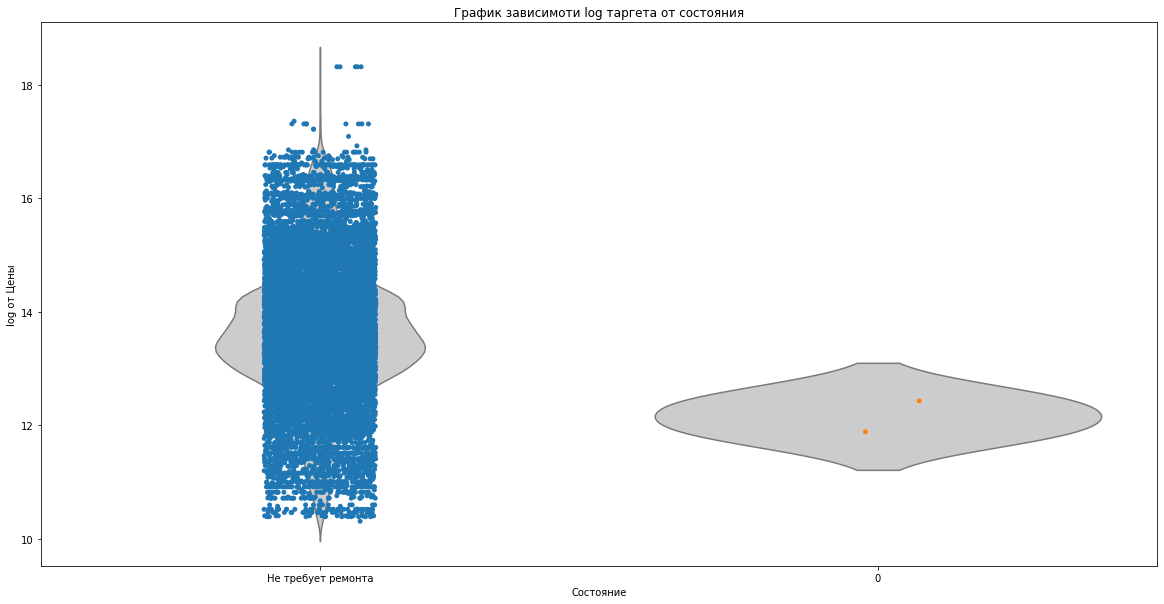

In [200]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(x="condition", y="log_price", data=df, inner=None, color=".8")
ax = sns.stripplot(x="condition", y="log_price", data=df)
plt.title('График зависимоти log таргета от состояния');
plt.xlabel('Состояние')
plt.ylabel('log от Цены')

## Посмотрим на зависимость log таргета от количества владельцев

Text(0, 0.5, 'log от Цены')

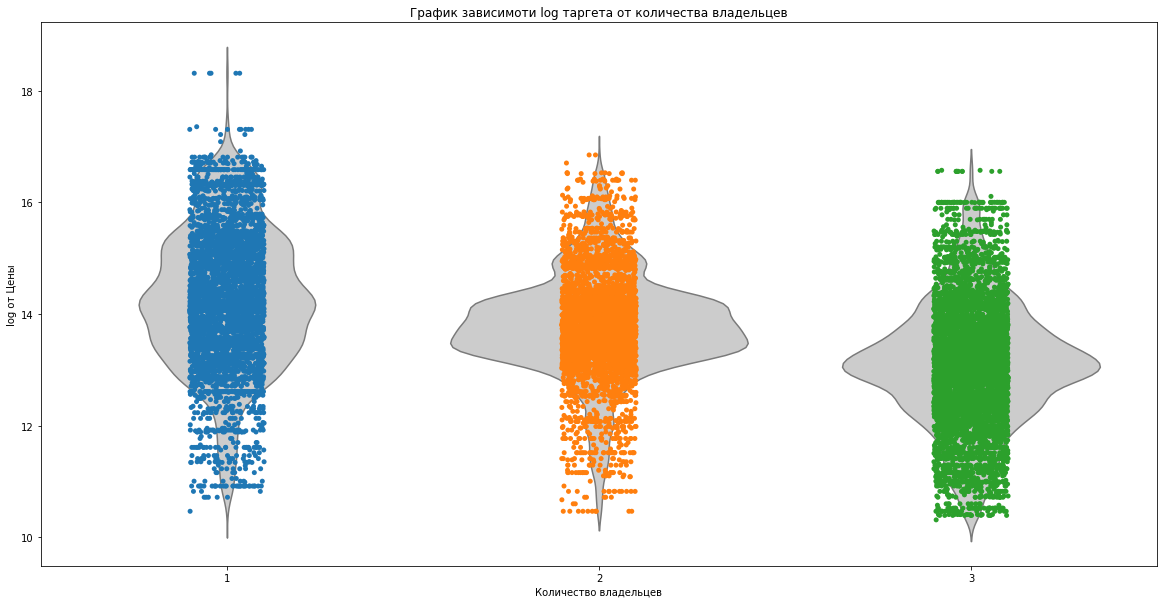

In [201]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(x="owners", y="log_price", data=df, inner=None, color=".8")
ax = sns.stripplot(x="owners", y="log_price", data=df)
plt.title('График зависимоти log таргета от количества владельцев');
plt.xlabel('Количество владельцев')
plt.ylabel('log от Цены')

**Вывод** зависимость очевидна

## Посмотрим на зависимость log таргета от типа ПТС

Text(0, 0.5, 'log от Цены')

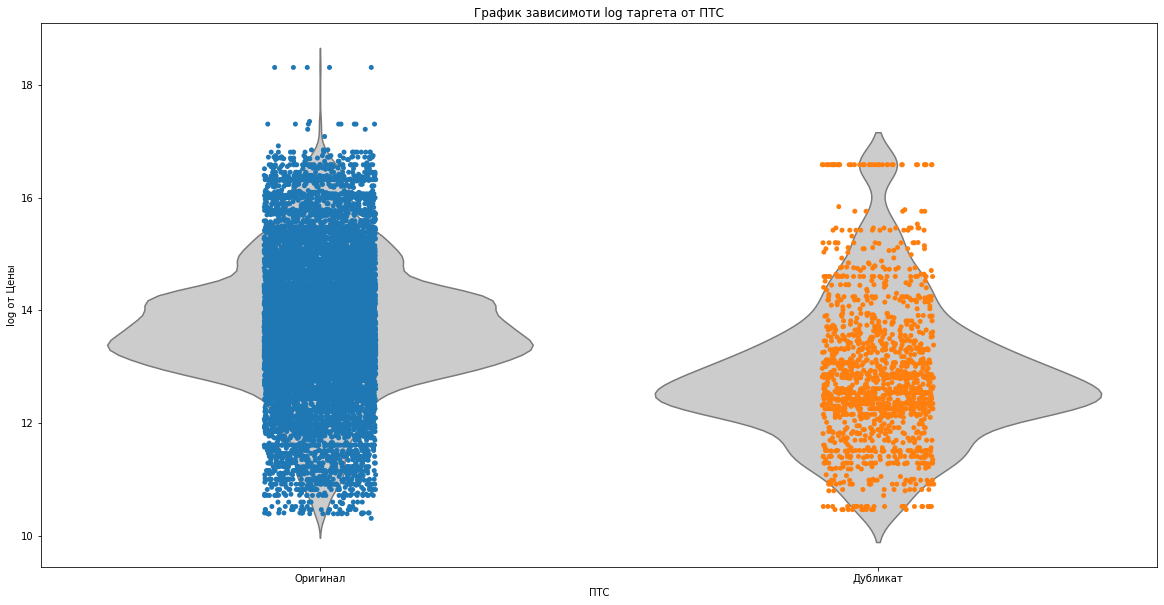

In [202]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(x="pasport", y="log_price", data=df, inner=None, color=".8")
ax = sns.stripplot(x="pasport", y="log_price", data=df)
plt.title('График зависимоти log таргета от ПТС');
plt.xlabel('ПТС')
plt.ylabel('log от Цены')

**Вывод** дубликат дешевле

## Посмотрим на зависимость log таргета от растаможки

Text(0, 0.5, 'log от Цены')

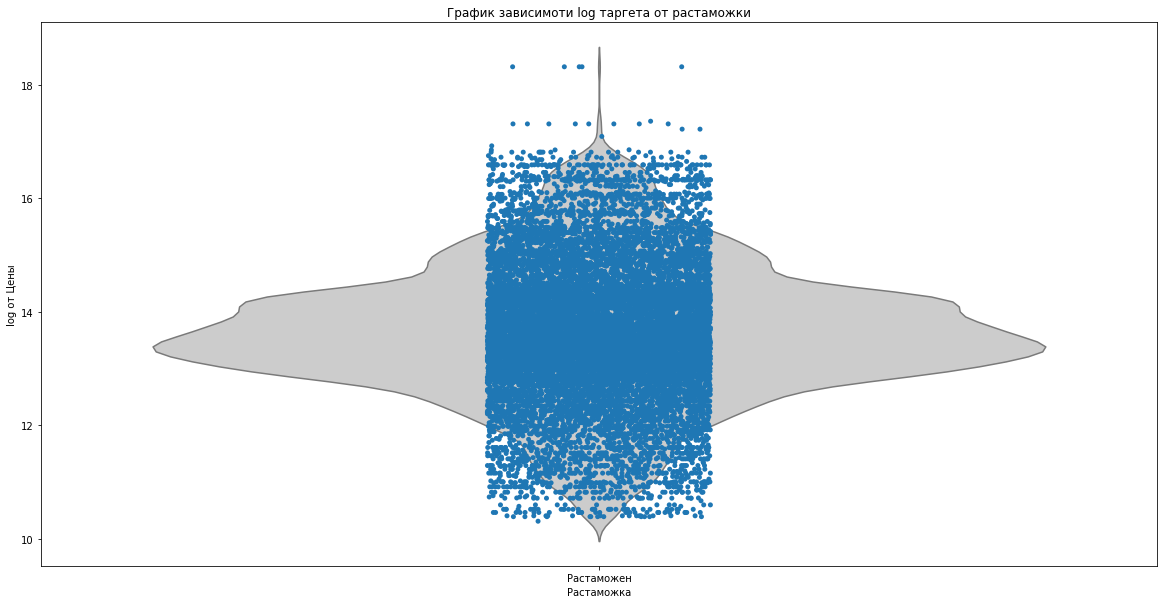

In [205]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(x="customs", y="log_price", data=df, inner=None, color=".8")
ax = sns.stripplot(x="customs", y="log_price", data=df)
plt.title('График зависимоти log таргета от растаможки');
plt.xlabel('Растаможка')
plt.ylabel('log от Цены')

Этот признак можно в печку

## Посмотрим на зависимость log таргета от марки автомобиля

In [10]:
# сгруппируем наши данные по марке автомобиля
gr_by_brand = df.groupby('car_brand')
gr = gr_by_brand.log_price.median().sort_values()
gr

car_brand
Москвич        10.819798
ГАЗ            11.002117
Hafei          11.050906
BYD            11.350418
Plymouth       11.512935
                 ...    
Porsche        15.712681
Bentley        15.894952
Rolls-Royce    16.001562
Ferrari        16.575521
ЗИЛ            16.811243
Name: log_price, Length: 76, dtype: float64

Text(0, 0.5, 'log от Цены')

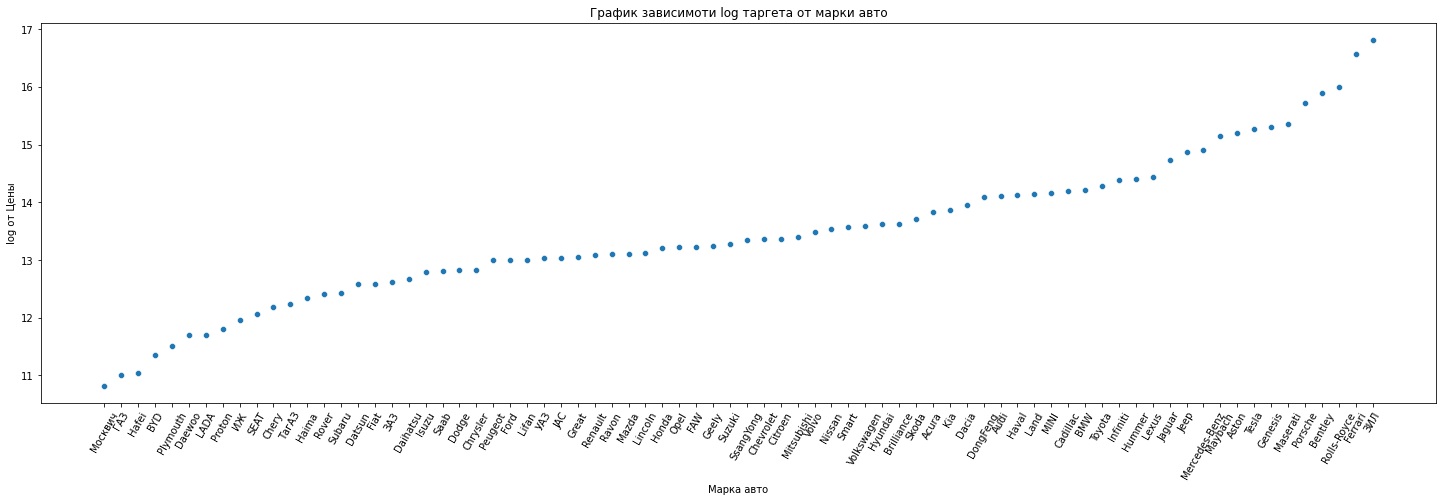

In [12]:
# постром графики зависимости log таргета от марки
plt.figure(figsize=(25,7))
x = sns.scatterplot(data=gr);
plt.title('График зависимоти log таргета от марки авто')
plt.xticks(rotation=60)
plt.xlabel('Марка авто')
plt.ylabel('log от Цены')


Text(0, 0.5, 'log от Цены')

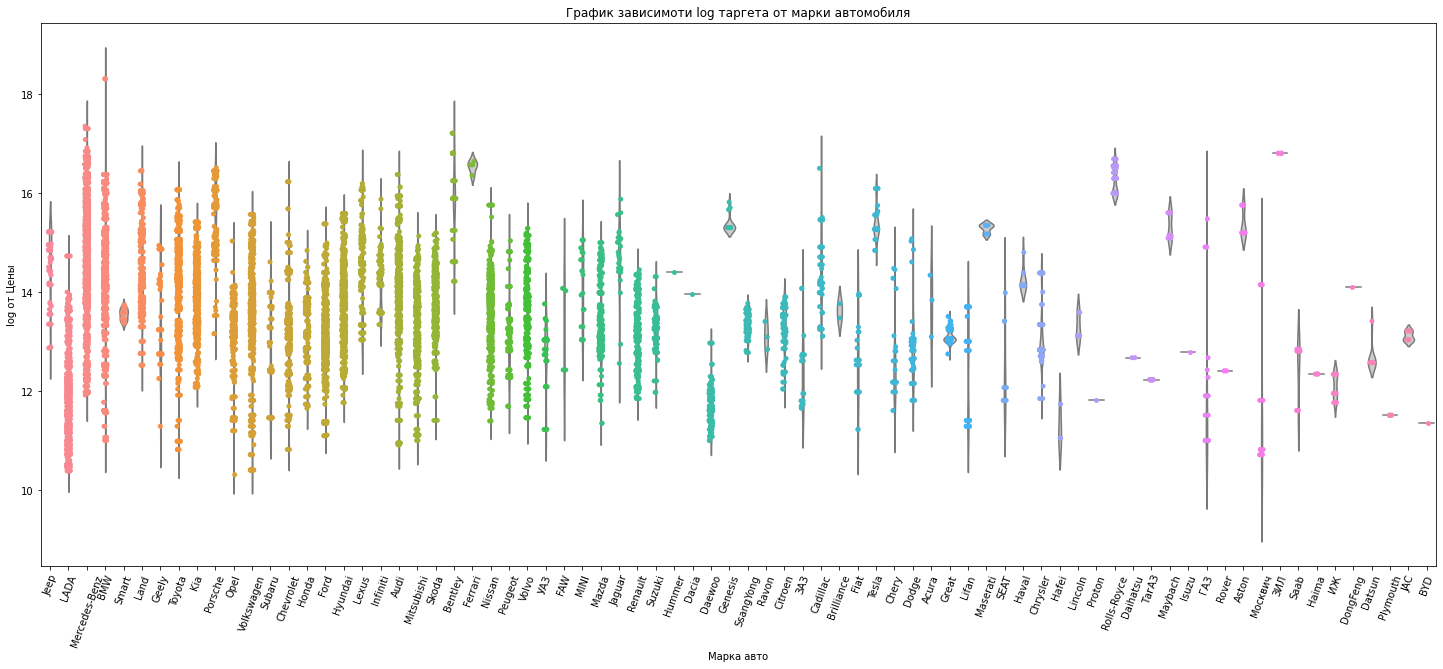

In [135]:
plt.figure(figsize=(25,10))
ax = sns.violinplot(x="car_brand", y="log_price", data=df, inner=None, color=".8")
ax = sns.stripplot(x="car_brand", y="log_price", data=df)
plt.title('График зависимоти log таргета от марки автомобиля');
plt.xticks(rotation=70)
plt.xlabel('Марка авто')
plt.ylabel('log от Цены')

### Посмотрим на зависимость log таргета от количества просмотров

In [25]:
max_w = df.views.max()

In [26]:
df[df.views == max_w]

,name,price,crash,year,run,back,color,engine,tax,transmission,drive,rudder,condition,owners,pasport,customs,cr_date,views,comment,engine_volume,horsepower,engine_type,car_brand,car_model,log_price
13380,LADA (ВАЗ) 2121 (4x4) I Рестайлинг,380000,ДТП не найдены,2014,27000,внедорожник 3 дв.,белый,"['1.7 л ', ' 83 л.с. ', ' Бензин']",996,механическая,полный,Левый,Не требует ремонта,3,Оригинал,Растаможен,2020-03-26,51528,"Продаётся ВАЗ-2121 Нива 3 дверка,2014г.в.в иде...",1.7 л,83 л.с.,Бензин,LADA,(ВАЗ) 2121 (4x4) I Рестайлинг,12.847929


Text(0, 0.5, 'log от Цены')

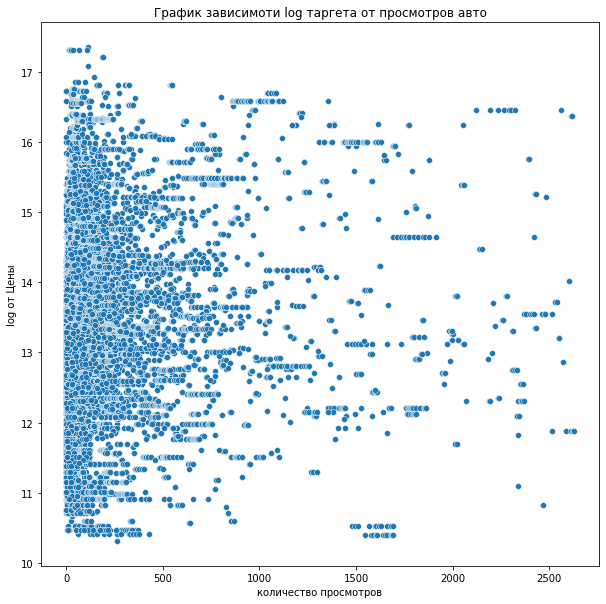

In [29]:
# постром графики зависимости log таргета от просмотров
views_up = df.views.quantile(0.99)
plt.figure(figsize=(10,10))
sns.scatterplot(data=df[df.views < views_up], x='views', y='log_price');
plt.title('График зависимоти log таргета от просмотров авто')
plt.xlabel('количество просмотров')
plt.ylabel('log от Цены')

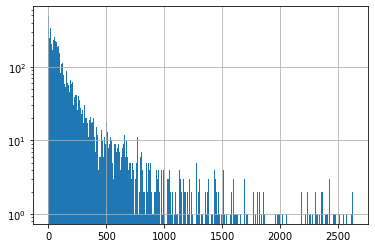

In [30]:
df[df.views < views_up].views.hist(bins=1000, log=True)

In [81]:
# уберем л.с. из колонки мощнасть двигателя
#df.horsepower = df.horsepower.apply(lambda x: int(x.split()[0]))

AttributeError: ignored

In [72]:
# для электромобилей необходимо переместить колонку лошадиных сил из объема двигателя
#df.horsepower.loc[df.engine_type == 'Электро'] = df[df.engine_type == 'Электро'].engine_volume.str.split(' ', expand=True)[0].values

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [83]:
# еще разок преобразуем все в int
#df.horsepower = df.horsepower.apply(lambda x: int(x))

In [78]:
# объем двигателя для электромобилей занулим
#df.engine_volume.loc[df.engine_type == 'Электро'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [60]:
# обработаем строки типа двигателя
#df.engine_type = df.engine_type.apply(lambda x: x.strip())

In [121]:
# сохраним DataFrame
df.to_excel(path + 'Data_avtoru_prep.xlsx', sheet_name='Cars')

### Теперь построим график зависимости log таргета от мощности двигателя

Text(0, 0.5, 'log от Цены')

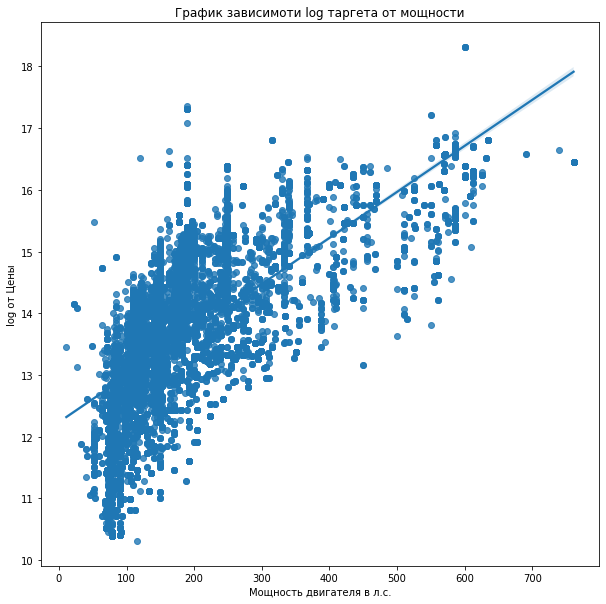

In [91]:
plt.figure(figsize=(10,10))
y = sns.regplot(data=df, x='horsepower', y='log_price');
plt.title('График зависимоти log таргета от мощности');
plt.xlabel('Мощность двигателя в л.с.')
plt.ylabel('log от Цены')

## Выводы

При выборе модели и метрик необходимо будет ориентироваться на то, что мы будем работать с log таргета, кроме того необходимо будет еще раз проверить зависимоть предполагаемого таргета от признаков.